In [ ]:
import numpy as np
from IPython.display import clear_output
from modules.plotter import print_result
from modules.golomb_simple import init_simple_problem

UDP = init_simple_problem()

## Genetico

## Scipy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

solution:  [ 0.21835217  0.23871056 -0.15075573 -0.14028291  0.31866852  0.37683394
 -0.44675452 -0.13210342  0.39638516 -0.2246715  -0.26405223  0.90722464
  0.04953683 -0.57679698 -0.0056112   0.67552777 -0.43225444 -0.57068775
  0.35372599  0.13804172  0.52656453  0.60641216 -0.42496929 -0.42135787
  0.88372974 -0.32379556 -0.08543933 -0.34592125 -0.84666001  0.37141473]
wrost Fill factor: -0.14286  ,	 wrost Empty factor(?) : 0.85714
XY


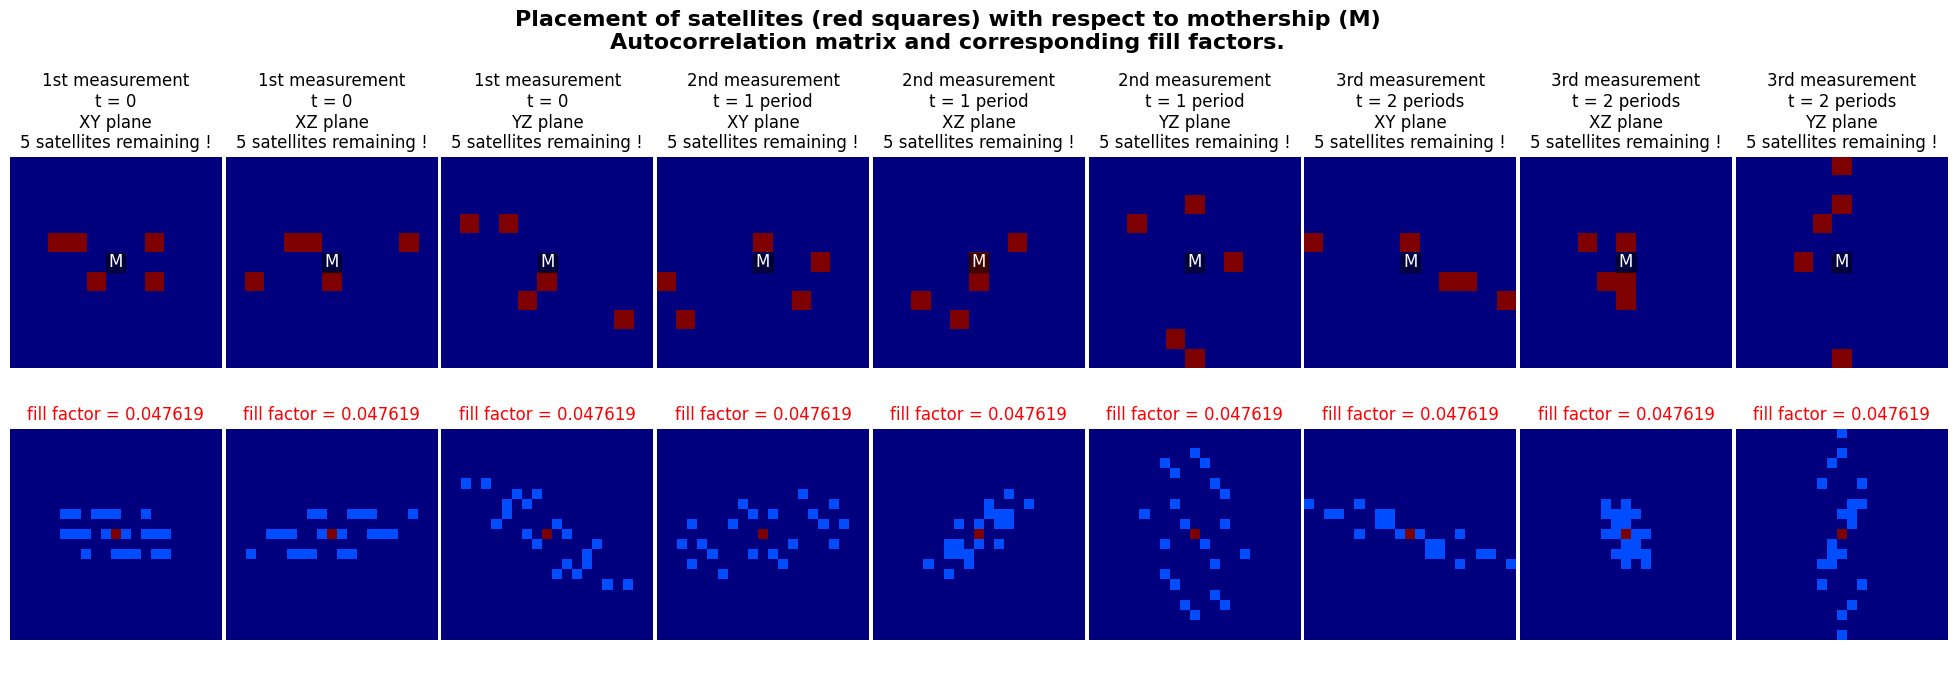

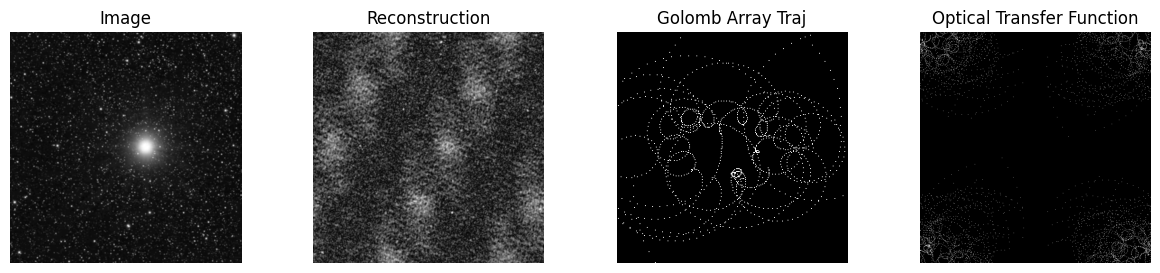

XZ


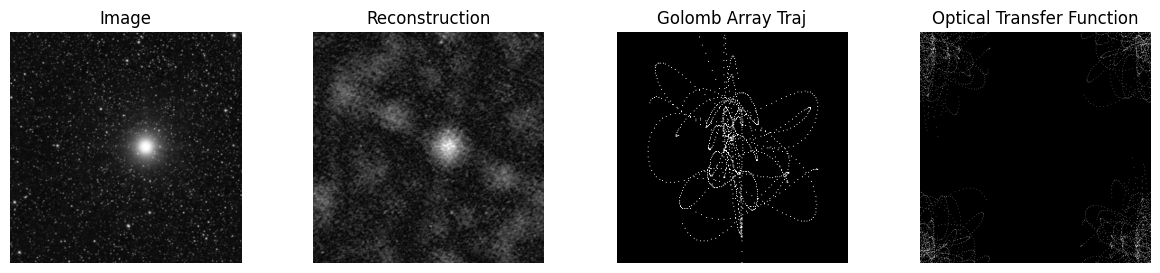

YZ


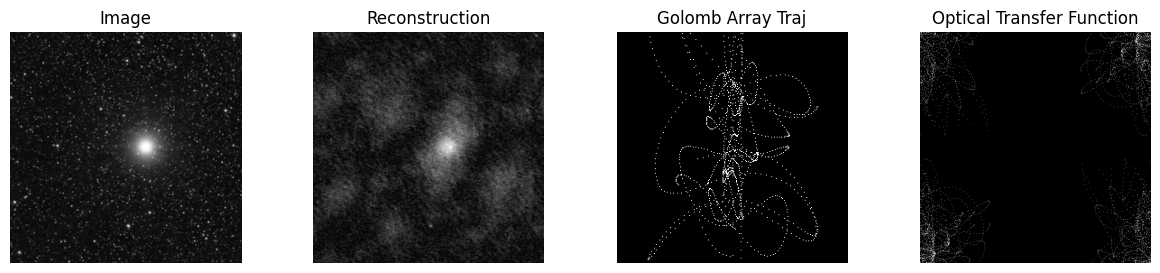

In [ ]:
from scipy.optimize import differential_evolution
# import numpy as np

# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness(solution)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

### Pygad (TODO: Da migliorare la configurazione)
Docs: https://pygad.readthedocs.io/en/stable/pygad.html

In [ ]:
raise Exception("TODO")


import pygad

def callback_generations(ga_instance):
    print(
        f"{ga_instance.generations_completed}: Best sol. = {ga_instance.best_solution()[0]} Fitness = {ga_instance.best_solution()[1]}"
    )

ga_instance = pygad.GA(
    num_generations=500,
    fitness_func=lambda pyGad,x,index: UDP.fitness(x)[0],
    save_best_solutions=False,
    on_generation=callback_generations,
    sol_per_pop=100,  # Numero di soluzioni per popolazione
    num_genes=30,  # Grandezza soluzione
    gene_type=float,

    # Soluzione a valori discreti
    gene_space = np.linspace(1.0,-1.0,10**5),    # Valori assumibili da ogni gene

    # Soluzione a valori continui ma possono uscire da [1.0,-1.0]
    #init_range_high=1,
    #init_range_low=-1,
    parent_selection_type="rws",  # sss (steady-state selection), rws (roulette wheel selection), sus (stochastic universal selection), rank, random, tournament.
    keep_parents=2,  # Numero di genitori mantenuti per ogni crossover (< sol_per_pop)
    num_parents_mating=5,  # Numero di genitori selezionati per generare figli
    crossover_type="single_point",  # single_point, two_points, uniform, and scattered .
    mutation_type="random",  # random, swap, inversion, scramble, and adaptive
    mutation_probability=0.2,
)
ga_instance.run()

x_sol, fitness, _ = ga_instance.best_solution()

clear_output()
_ = ga_instance.plot_fitness()  # Mostra grafico della convergenza
print_result(UDP, x_sol)
del ga_instance, fitness

Exception: Da configurare